In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1=pd.read_excel('HR_1.xlsx')
df2=pd.read_excel('HR_2.xlsx')

In [5]:
df1.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus
0,31,No,Non-Travel,158,Software,7,3,Medical,1,1,3,Male,42,2,3,Developer,1,Married
1,38,No,Travel_Rarely,985,Human Resources,33,5,Life Sciences,1,2,1,Female,66,2,4,Healthcare Representative,3,Single
2,59,Yes,Non-Travel,1273,Sales,5,2,Technical Degree,1,3,4,Female,96,1,3,Manufacturing Director,2,Married
3,52,Yes,Travel_Rarely,480,Support,2,5,Marketing,1,4,4,Female,71,2,4,Human Resources,1,Married
4,32,No,Non-Travel,543,Human Resources,7,5,Human Resources,1,5,2,Male,122,3,3,Manager,2,Divorced


In [12]:
df2.head(5)

,Employee ID,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,6,41552,1246560,3,Y,Yes,15,4,3,80,1,33,4,2,16,4,14,3
1,7,5303,148484,3,Y,No,45,4,1,80,1,4,3,4,2,1,1,2
2,8,28555,571100,2,Y,Yes,35,3,2,80,1,2,2,2,2,2,2,2
3,11,10587,95283,0,Y,Yes,47,4,2,80,1,38,3,4,24,19,8,6
4,13,34153,648907,7,Y,No,17,1,3,80,1,30,2,2,15,3,8,4


In [11]:
df1['Attrition_no']=df1['Attrition'].map({'Yes': 1, 'No': 0})
a=df1.groupby('Department')['Attrition_no'].mean()*100
print(a)

Department
Hardware                  49.443016
Human Resources           49.857448
Research & Development    51.208078
Sales                     50.017745
Software                  50.539827
Support                   50.186635
Name: Attrition_no, dtype: float64


In [14]:
b=df1.groupby('JobRole')['HourlyRate'].mean()
print(b)

JobRole
Developer                    114.175527
Healthcare Representative    116.291179
Human Resources              116.189123
Laboratory Technician        116.156555
Manager                      115.048650
Manufacturing Director       116.111379
Research Director            115.367237
Research Scientist           115.164212
Sales Executive              115.381556
Sales Representative         114.468221
Name: HourlyRate, dtype: float64


In [20]:
c=df1[(df1['Gender']=='Male')&(df1['JobRole']=='Research Scientist')]['HourlyRate'].mean()
print('Average Hourly rate of Male Research Scientist:=',c)

Average Hourly rate of Male Research Scientist:= 114.44689069138664


In [27]:
df = pd.merge(df1, df2, left_on='EmployeeNumber', right_on='Employee ID')
df['Attrition_numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numeric
0,31,No,Non-Travel,158,Software,7,3,Medical,1,1,...,80,2,15,1,2,12,4,10,11,0
1,38,No,Travel_Rarely,985,Human Resources,33,5,Life Sciences,1,2,...,80,4,5,4,3,1,1,1,1,0
2,59,Yes,Non-Travel,1273,Sales,5,2,Technical Degree,1,3,...,80,2,9,5,1,6,6,4,3,1
3,52,Yes,Travel_Rarely,480,Support,2,5,Marketing,1,4,...,80,2,22,4,4,10,9,5,6,1
4,32,No,Non-Travel,543,Human Resources,7,5,Human Resources,1,5,...,80,2,30,3,4,29,27,9,7,0


In [28]:
income_stats = df.groupby('Attrition_numeric')['MonthlyIncome'].mean()
print(income_stats)

Attrition_numeric
0    25958.486443
1    26072.596813
Name: MonthlyIncome, dtype: float64


In [30]:
df['Income_Band'] = pd.qcut(df['MonthlyIncome'], 4)
attrition_income = df.groupby('Income_Band')['Attrition_numeric'].mean()
print(attrition_income)

Income_Band
(1000.999, 13519.75]    0.50120
(13519.75, 25988.5]     0.49968
(25988.5, 38460.25]     0.50120
(38460.25, 50999.0]     0.50632
Name: Attrition_numeric, dtype: float64


C:\Users\EM600128\AppData\Local\Temp\ipykernel_15788\1408718451.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_income = df.groupby('Income_Band')['Attrition_numeric'].mean()


In [32]:
correlation = df['Attrition_numeric'].corr(df['MonthlyIncome'])
print(correlation)

0.003959152145608173


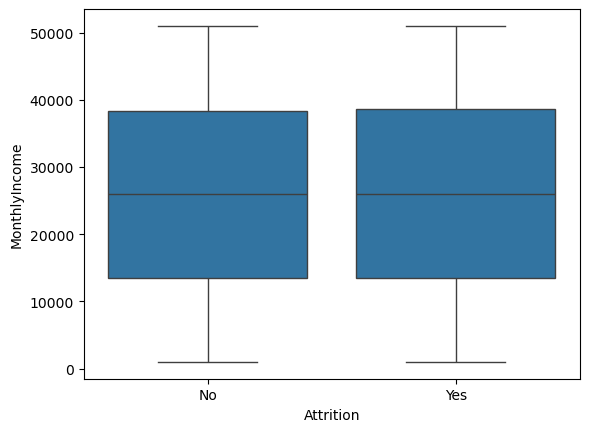

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.show()

In [34]:
avg_working_years = df.groupby('Department')['TotalWorkingYears'].mean()
print('Average working years for each Department:',avg_working_years)

Average working years for each Department: Department
Hardware                  20.479373
Human Resources           20.453671
Research & Development    20.298473
Sales                     20.617769
Software                  20.645274
Support                   20.484527
Name: TotalWorkingYears, dtype: float64


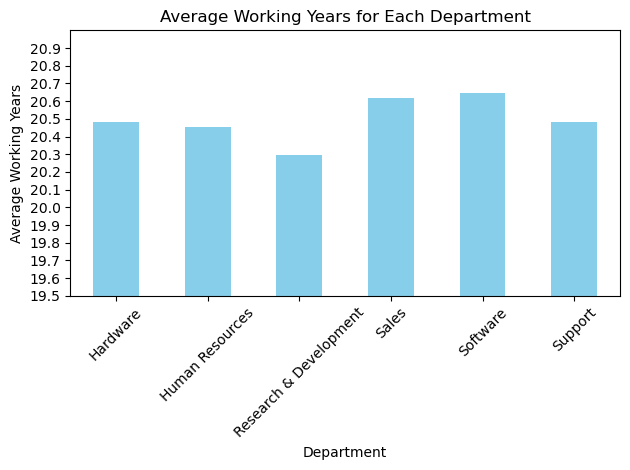

In [43]:
import matplotlib.pyplot as plt
avg_working_years.plot(kind='bar', color='skyblue')
plt.title('Average Working Years for Each Department')
plt.xlabel('Department')
plt.ylabel('Average Working Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(19.5, 21.0)
plt.yticks(np.arange(19.5, 21.0, 0.1))
plt.tight_layout()
plt.show()

JobRole
Developer                    2.511334
Healthcare Representative    2.506640
Human Resources              2.505276
Laboratory Technician        2.490432
Manager                      2.496624
Manufacturing Director       2.501608
Research Director            2.493830
Research Scientist           2.513933
Sales Executive              2.468830
Sales Representative         2.498904
Name: WorkLifeBalance, dtype: float64


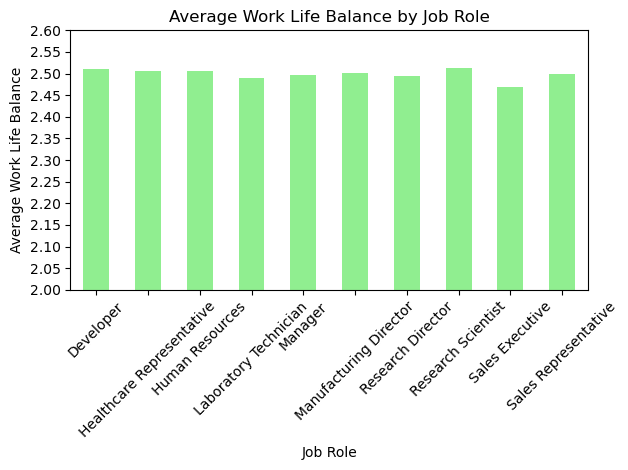

In [47]:
import matplotlib.pyplot as plt
avg_wlb = df.groupby('JobRole')['WorkLifeBalance'].mean()
print(avg_wlb)
avg_wlb.plot(kind='bar', color='lightgreen')
plt.title('Average Work Life Balance by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Average Work Life Balance')
plt.xticks(rotation=45)
plt.ylim(2.0, 2.6)
plt.yticks(np.arange(2.0,2.6, 0.05))
plt.tight_layout()
plt.show()

In [48]:
df['Attrition_numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})
attrition_promo = df.groupby('YearsSinceLastPromotion')['Attrition_numeric'].mean() * 100
print(attrition_promo)

YearsSinceLastPromotion
1     50.136810
2     50.070126
3     49.960270
4     51.283381
5     50.548761
6     51.339969
7     50.761649
8     49.109552
9     49.419355
10    48.857775
11    49.349523
12    48.121827
13    49.946638
14    51.833123
15    49.513213
16    49.739130
17    48.113208
18    50.675676
19    52.839506
20    50.442478
21    47.241379
22    53.159851
23    56.277056
24    49.726776
25    49.696970
26    51.020408
27    47.933884
28    50.000000
29    47.252747
30    58.730159
31    49.152542
32    56.140351
33    60.526316
34    32.000000
35    33.333333
36    55.555556
37    77.777778
38    50.000000
39    50.000000
40     0.000000
Name: Attrition_numeric, dtype: float64


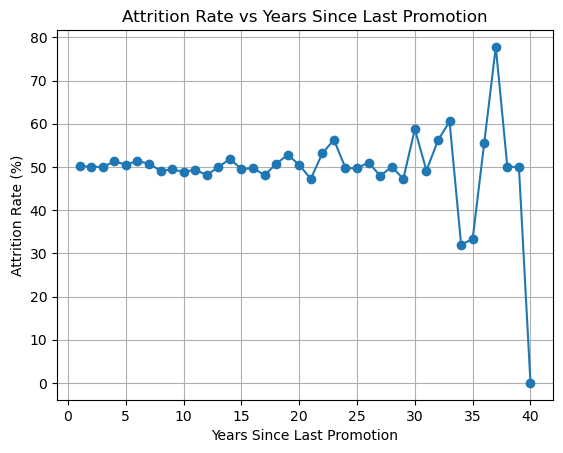

In [49]:
import matplotlib.pyplot as plt
attrition_promo.plot(marker='o')
plt.title('Attrition Rate vs Years Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Attrition Rate (%)')
plt.grid(True)
plt.show()